In [8]:
%R dat <- as.data.frame(read.csv('output_final.csv', sep = ",", header = TRUE));

# Model to Predict Choice Confidence in Value-Based (Deck) Task (Confidence Link Model)

Abbreviations: 

conf2 = choice confidence in Value-Based Task

conf1 = choice confidence in Perceptual Task

rating_rt = Response time in Perceptual Task

rating_2_rt = Response time in Value-Based Task

participant = index of participants ( which are 4,5,6,7,8 and 9)

Answer = If participant wins Answer=1 else Answer=0

choose_correct_deck = If participants selects the deck with higher probability choose_correct_deck=1, else choose_correct_deck=0

In [9]:
%%R mod <- lmer(conf2~ 0 + conf1 + rating_rt + rating_2_rt + rating_2_rt:conf1 +
                (0 + conf1 + rating_rt + rating_2_rt + rating_2_rt:conf1|participant), data = dat)

coefs <- data.frame(coef(summary(mod)))

df.KR <- get_ddf_Lb(mod, fixef(mod))

coefs$df.KR <-(rep(df.KR, each=4))

coefs$semax <- coefs$Estimate + (coefs$Std..Error)
coefs$semin <- coefs$Estimate - (coefs$Std..Error)

coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

In [8]:
%R summary(mod)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: conf2 ~ 0 + conf1 + rating_rt + rating_2_rt + rating_2_rt:conf1 +  
    (0 + conf1 + rating_rt + rating_2_rt + rating_2_rt:conf1 |  
        participant)
   Data: dat

REML criterion at convergence: 13590.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8800 -0.5691 -0.0459  0.6370  3.3539 

Random effects:
 Groups      Name              Variance  Std.Dev. Corr             
 participant conf1               0.12924  0.3595                   
             rating_rt           1.86304  1.3649   0.44            
             rating_2_rt        12.96103  3.6001  -0.14 -0.55      
             conf1:rating_2_rt   0.02916  0.1708  -0.84 -0.29 -0.31
 Residual                      109.65201 10.4715                   
Number of obs: 1794, groups:  participant, 6

Fixed effects:
                  Estimate Std. Error       df t value Pr(>|t|)   
conf1              0.97

In [10]:
%R -o coefs
conf_table_exp1 = coefs
conf_table_exp1.columns = ['coefficient', 'se', 'defr', 't', 'prt', 'DF', 'CImax', 'CImin', 'p', 'p2']
conf_table_exp1 = conf_table_exp1.iloc[:, 0:-1].copy(); conf_table_exp1.loc[:, 'SEmax'] = conf_table_exp1['coefficient'] + conf_table_exp1['se']*2
conf_table_exp1.loc[:, 'SEmin'] = conf_table_exp1['coefficient'] - conf_table_exp1['se']*2
conf_table_exp1 = conf_table_exp1.transpose()
conf_table_exp1.columns = [ 'conf1', 'rating_rt', 'rating_2_rt', 'conf1:rating_2_rt']
conf_table_exp1.loc['p'] = np.round(conf_table_exp1.loc['p'], 5)
conf_table_exp1 = conf_table_exp1[[ 'conf1', 'rating_rt', 'rating_2_rt', 'conf1:rating_2_rt']]
conf_table_exp1 = conf_table_exp1.drop(['defr', 'prt'])
conf_table_exp1.columns = ['Perceptual Confidence', 'Perceptual Response Time', 'Value-Based Response Time', 'Perceptual Conf x Value-Based RT']
conf_table_exp1

,Perceptual Confidence,Perceptual Response Time,Value-Based Response Time,Perceptual Conf x Value-Based RT
coefficient,0.973632,0.654475,5.181141,-0.296272
se,0.150638,0.571745,1.509358,0.072087
t,6.463375,1.144697,3.432679,-4.109952
DF,6.043966,6.043966,6.043966,6.043966
CImax,1.124271,1.226221,6.690498,-0.224186
CImin,0.822994,0.082730,3.671783,-0.368359
p,0.000630,0.295630,0.013770,0.006190
SEmax,1.274909,1.797966,8.199856,-0.152099
SEmin,0.672355,-0.489016,2.162425,-0.440446


# Coefficient Table for Predicting Value-Based Confidence

Coefficients which are written in red are statistically significant.

[None]

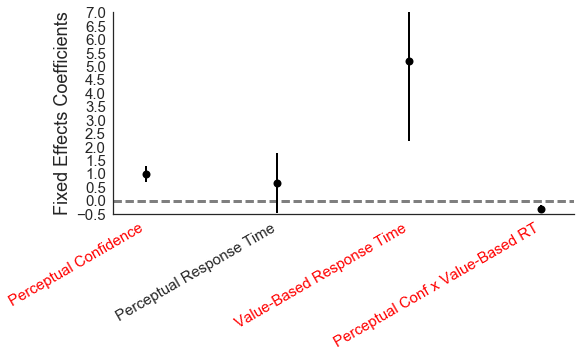

In [11]:
Coefpresplot(conf_table_exp1, title='', intercept=True, ticklabsize=15, size='narrow')
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:1]]
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[2:3]]
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[3:4]]

# Plotting of Prediction of Value-Based Confidence by Perceptual Confidence for each participant - Simplistic Confidence Leak Model

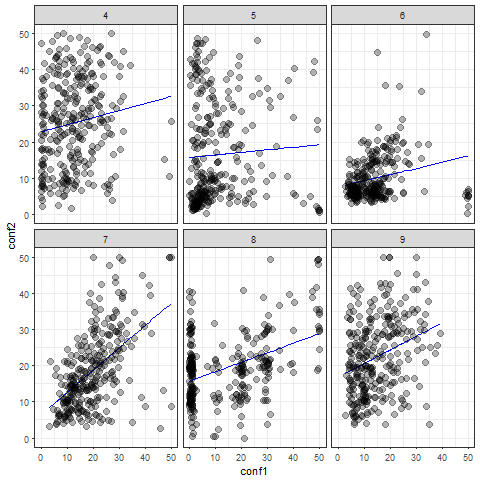

In [12]:
%%R 
mod_2 <- lmer(conf2 ~ 1 +conf1 + (1 + conf1|participant), data = dat)
dat$mod_pred <- fitted(mod_2)
gg <- ggplot(dat, aes(x =conf1, y = conf2, group = participant)) +
    geom_line(aes(y = mod_pred), color = "blue") +
    geom_point(alpha = 0.3, size = 3) +
    facet_wrap(~participant) +
    theme_bw()

print(gg)

# Plotting of Prediction of Value-Based Confidence by Perceptual Confidence for all observations (pooled data)

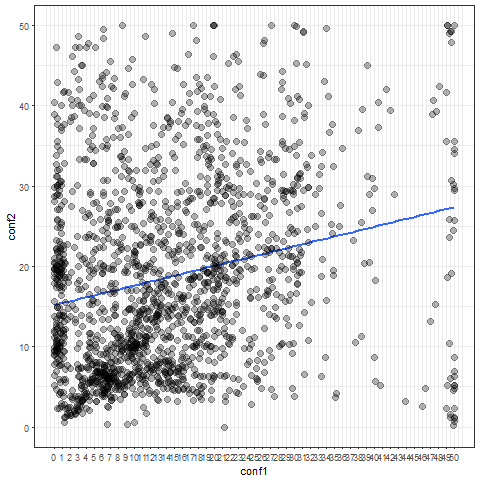

In [13]:
%%R 
gg <- ggplot(dat, aes(x = conf1, y = conf2)) +
    geom_smooth(method = "lm", se = FALSE) +
    geom_point(alpha = 0.3, size = 3) +
    theme_bw() + 
    scale_x_continuous(breaks = 0:50)

print(gg)

# Model to Predict Answer (1 = Participant wins, 0 = Loses) - ANSWER MODEL

In [14]:
%%R mod_log <- glmer(Answer~ 1 + conf2 + rating_2_rt + rating_rt + conf1 +( 0 + conf2|participant), 
                     data = dat, family='binomial')
fix_1a <- fixef(mod_log)
fix_se_1a <- sqrt(diag(vcov(mod_log)))
names_1a <- names(fix_1a)

In [10]:
%R summary(mod_log)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Answer ~ 1 + conf2 + rating_2_rt + rating_rt + conf1 + (0 + conf2 |  
    participant)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
  2415.2   2448.2  -1201.6   2403.2     1788 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3047 -0.9617  0.5648  0.9483  1.3707 

Random effects:
 Groups      Name  Variance Std.Dev.
 participant conf2 0.000268 0.01637 
Number of obs: 1794, groups:  participant, 6

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.308352   0.160661  -1.919   0.0549 .
conf2        0.020073   0.008501   2.361   0.0182 *
rating_2_rt -0.034000   0.057608  -0.590   0.5551  
rating_rt    0.006623   0.021780   0.304   0.7610  
conf1        0.003022   0.004858   0.622   0.5339  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           

In [15]:
%R -o fix_1a -o fix_se_1a -o names_1a
choice_table_exp1 = regtable(fix_1a, fix_se_1a, names_1a)
choice_table_exp1
cols = ['(Intercept)', 'conf2', 'rating_2_rt', 'rating_rt', 'conf1']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['(Intercept)', 'Value-Based Confidence', 'Value-Based Response Time', " Perceptual Response Time", 
                             'Perceptual Confidence']
choice_table_exp1

,(Intercept),Value-Based Confidence,Value-Based Response Time,Perceptual Response Time,Perceptual Confidence
coefficient,-0.308352,0.020073,-0.034000,0.006623,0.003022
se,0.160661,0.008501,0.057608,0.021780,0.004858
CImin,-0.623247,0.003411,-0.146912,-0.036065,-0.006499
CImax,0.006543,0.036736,0.078912,0.049311,0.012543


[None]

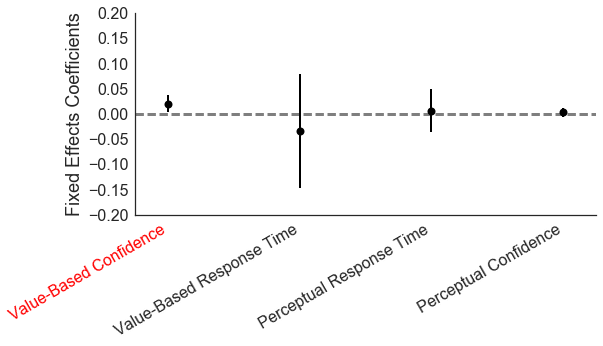

In [16]:
Coefpresplot(choice_table_exp1, title='', ticklabsize=16, size='narrow',
             ylimits=(-0.2, 0.2), ymultiple=0.05)
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:1]]

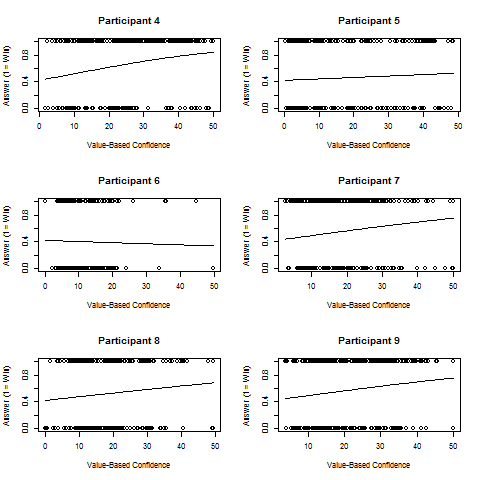

In [17]:
%%R
old.par <- par(mfrow=c(3, 2))

plot (dat$conf2[dat$participant ==4], dat$Answer[dat$participant==4], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = 'Participant 4')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[1, c('conf2')]*x), add = TRUE)

plot (dat$conf2[dat$participant ==5], dat$Answer[dat$participant==5], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = 'Participant 5')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[2, c('conf2')]*x), add = TRUE)

plot (dat$conf2[dat$participant ==6], dat$Answer[dat$participant==6], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = 'Participant 6')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[3, c('conf2')]*x), add = TRUE)

plot (dat$conf2[dat$participant ==7], dat$Answer[dat$participant==7], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = 'Participant 7')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[4, c('conf2')]*x), add = TRUE)

plot (dat$conf2[dat$participant ==8], dat$Answer[dat$participant==8], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = 'Participant 8')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[5, c('conf2')]*x), add = TRUE)

plot (dat$conf2[dat$participant ==9], dat$Answer[dat$participant==9], xlab = "Value-Based Confidence", ylab = 'Answer (1 = Win)', main = 'Participant 9')
curve (invlogit (fixef(mod_log)[1] + fixef(mod_log)[2]*x + ranef(mod_log)$participant[6, c('conf2')]*x), add = TRUE)

par(old.par)

# Hierarchical Regression of Correct Deck Choice (whether participant chooses the deck with higher probability)  - CORRECT DECK MODEL

In [18]:
%%R 
mod_log_1 <- glmer(choose_correct_deck ~ 1 + conf2 + rating_2_rt + rating_rt + (0+ rating_rt|participant) +
                  (1|participant) +(0 + conf2|participant), data = dat, family = 'binomial')

fix_2a <- fixef(mod_log_1)
fix_se_2a <- sqrt(diag(vcov(mod_log_1)))
names_2a <- names(fix_2a)

In [12]:
%R summary(mod_log_1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choose_correct_deck ~ 1 + conf2 + rating_2_rt + rating_rt + (0 +  
    rating_rt | participant) + (1 | participant) + (0 + conf2 |  
    participant)
   Data: dat

     AIC      BIC   logLik deviance df.resid 
  2063.9   2102.3  -1024.9   2049.9     1787 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1124 -0.8019  0.4269  0.7400  1.5215 

Random effects:
 Groups        Name        Variance Std.Dev.
 participant   rating_rt   0.01400  0.11832 
 participant.1 (Intercept) 0.15290  0.39102 
 participant.2 conf2       0.00368  0.06066 
Number of obs: 1794, groups:  participant, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.53768    0.24425  -2.201   0.0277 *
conf2        0.05160    0.02596   1.988   0.0468 *
rating_2_rt  0.14577    0.06550   2.225   0.0261 *
rating_rt    0.04186    0.05726   0.731   0.4647

In [19]:
%R -o fix_2a -o fix_se_2a -o names_2a
choice_table2_exp1 = regtable(fix_2a, fix_se_2a, names_2a)
choice_table2_exp1
cols = [ '(Intercept)', 'conf2', 'rating_2_rt', 'rating_rt']
choice_table2_exp1 = choice_table2_exp1[cols]
choice_table2_exp1.columns = ['(Intercept)', 'Value-Based Confidence', 'Value-Based Response Time ', 'Perceptual Response Time']
choice_table2_exp1

,(Intercept),Value-Based Confidence,Value-Based Response Time,Perceptual Response Time
coefficient,-0.537684,0.051602,0.145766,0.041859
se,0.244254,0.025957,0.065504,0.057258
CImin,-1.016421,0.000727,0.017378,-0.070367
CImax,-0.058946,0.102478,0.274153,0.154084


[None, None]

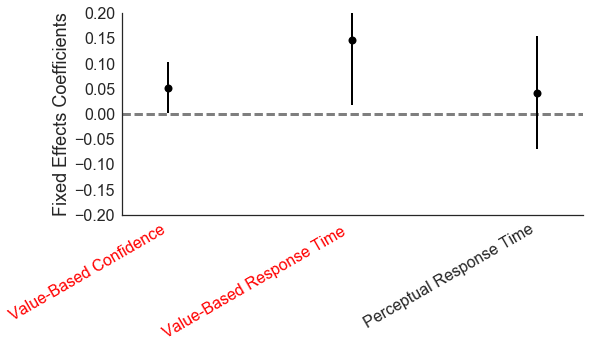

In [20]:
Coefpresplot(choice_table2_exp1, title='', ticklabsize=16, size='narrow',
             ylimits=(-0.2, 0.2), ymultiple=0.05)
[i.set_color('#ff0000') for i in plt.gca().get_xticklabels()[0:2]]

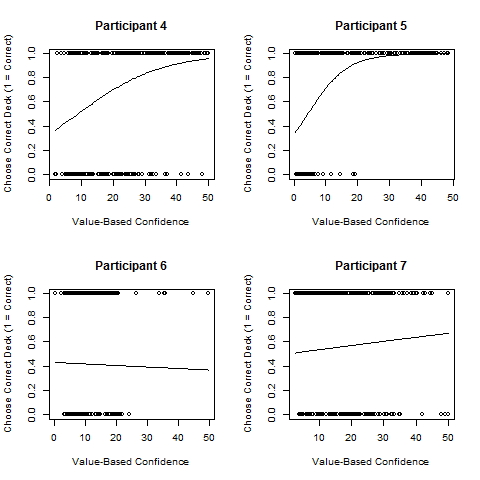

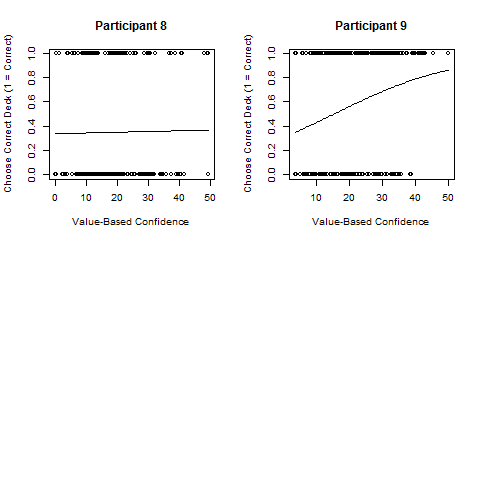

In [23]:
%%R
old.par <- par(mfrow=c(2, 2))

plot (dat$conf2[dat$participant == 4], dat$choose_correct_deck[dat$participant==4], xlab = "Value-Based Confidence", 
      ylab = 'Choose Correct Deck (1 = Correct)', main = 'Participant 4')
curve (invlogit (fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[1,c('(Intercept)')] + fixef(mod_log_1)[2]*x + 
                 ranef(mod_log_1)$participant[1, c('conf2')]*x) ,add = TRUE)

plot (dat$conf2[dat$participant == 5], dat$choose_correct_deck[dat$participant==5], xlab = "Value-Based Confidence", 
      ylab = 'Choose Correct Deck (1 = Correct)', main = 'Participant 5')
curve (invlogit (fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[2,c('(Intercept)')] + fixef(mod_log_1)[2]*x + 
                 ranef(mod_log_1)$participant[2, c('conf2')]*x) ,add = TRUE)

plot (dat$conf2[dat$participant == 6], dat$choose_correct_deck[dat$participant==6], xlab = "Value-Based Confidence", 
      ylab = 'Choose Correct Deck (1 = Correct)', main = 'Participant 6')
curve (invlogit (fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[3,c('(Intercept)')] + fixef(mod_log_1)[2]*x + 
                 ranef(mod_log_1)$participant[3, c('conf2')]*x) ,add = TRUE)

plot (dat$conf2[dat$participant == 7], dat$choose_correct_deck[dat$participant==7], xlab = "Value-Based Confidence", 
      ylab = 'Choose Correct Deck (1 = Correct)', main = 'Participant 7')
curve (invlogit (fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[4,c('(Intercept)')] + fixef(mod_log_1)[2]*x + 
                 ranef(mod_log_1)$participant[4, c('conf2')]*x) ,add = TRUE)

plot (dat$conf2[dat$participant == 8], dat$choose_correct_deck[dat$participant==8], xlab = "Value-Based Confidence", 
      ylab = 'Choose Correct Deck (1 = Correct)', main = 'Participant 8')
curve (invlogit (fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[5,c('(Intercept)')] + fixef(mod_log_1)[2]*x + 
                 ranef(mod_log_1)$participant[5, c('conf2')]*x) ,add = TRUE)

plot (dat$conf2[dat$participant == 9], dat$choose_correct_deck[dat$participant==9], xlab = "Value-Based Confidence", 
      ylab = 'Choose Correct Deck (1 = Correct)', main = 'Participant 9')
curve (invlogit (fixef(mod_log_1)[1] + ranef(mod_log_1)$participant[6,c('(Intercept)')] + fixef(mod_log_1)[2]*x + 
                 ranef(mod_log_1)$participant[6, c('conf2')]*x) ,add = TRUE)

par(old.par)

# Data Diagnostics

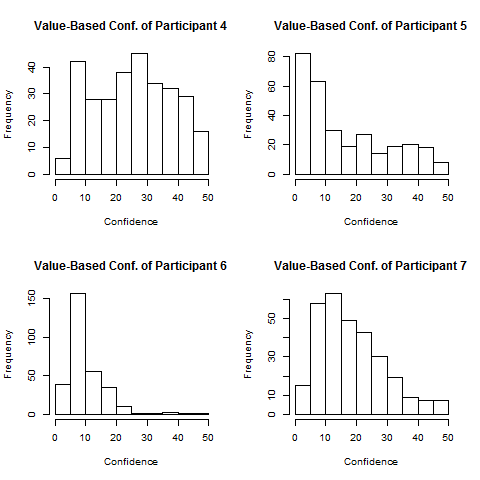

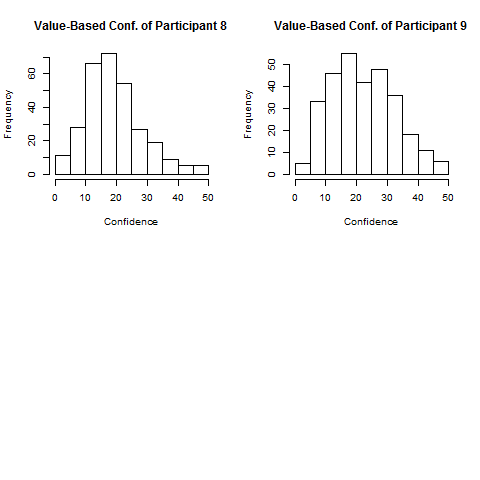

In [24]:
%%R
old.par <- par(mfrow=c(2, 2))
hist(dat$conf2[dat$participant == 4], main = 'Value-Based Conf. of Participant 4', xlab = 'Confidence')
hist(dat$conf2[dat$participant == 5], main = 'Value-Based Conf. of Participant 5', xlab = 'Confidence')
hist(dat$conf2[dat$participant == 6], main = 'Value-Based Conf. of Participant 6', xlab = 'Confidence')
hist(dat$conf2[dat$participant == 7], main = 'Value-Based Conf. of Participant 7', xlab = 'Confidence')
hist(dat$conf2[dat$participant == 8], main = 'Value-Based Conf. of Participant 8', xlab = 'Confidence')
hist(dat$conf2[dat$participant == 9], main = 'Value-Based Conf. of Participant 9', xlab = 'Confidence')
par(old.par)

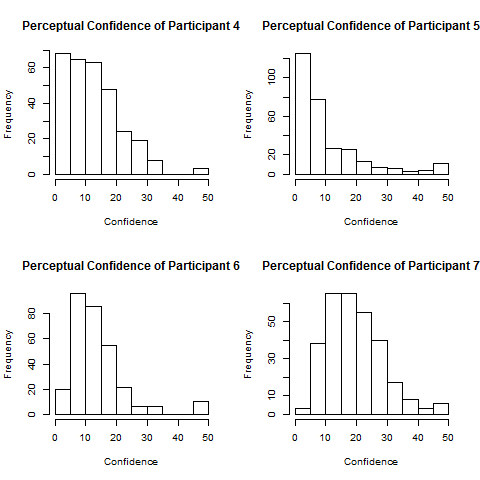

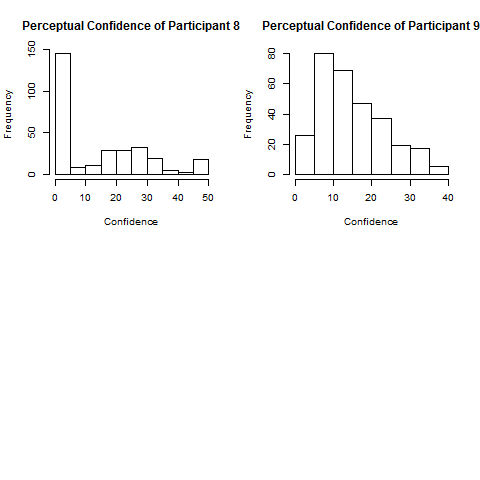

In [25]:
%%R
old.par <- par(mfrow=c(2, 2))
hist(dat$conf1[dat$participant == 4], main = 'Perceptual Confidence of Participant 4', xlab = 'Confidence')
hist(dat$conf1[dat$participant == 5], main = 'Perceptual Confidence of Participant 5', xlab = 'Confidence')
hist(dat$conf1[dat$participant == 6], main = 'Perceptual Confidence of Participant 6', xlab = 'Confidence')
hist(dat$conf1[dat$participant == 7], main = 'Perceptual Confidence of Participant 7', xlab = 'Confidence')
hist(dat$conf1[dat$participant == 8], main = 'Perceptual Confidence of Participant 8', xlab = 'Confidence')
hist(dat$conf1[dat$participant == 9], main = 'Perceptual Confidence of Participant 9', xlab = 'Confidence')
par(old.par)

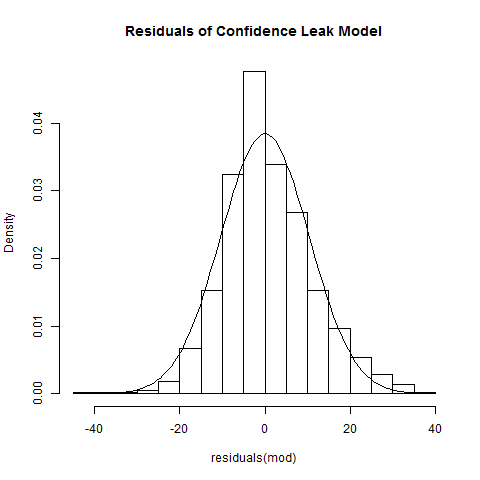

In [26]:
%%R 
hist(residuals(mod),prob=TRUE, main = 'Residuals of Confidence Leak Model')
curve(dnorm(x,mean=0,sd=sd(residuals(mod))),add=TRUE)

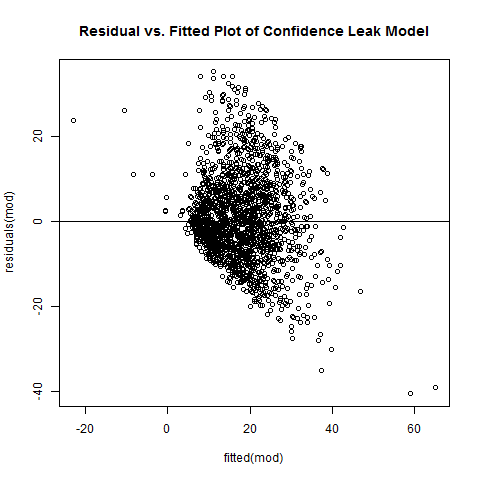

In [27]:
%%R 
plot(fitted(mod), residuals(mod), main = 'Residual vs. Fitted Plot of Confidence Leak Model')
abline(h = 0)

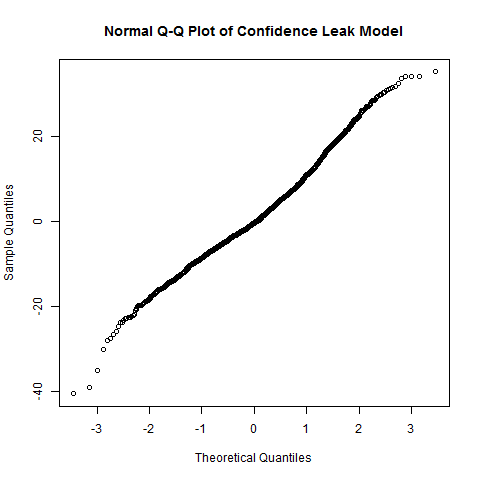

In [28]:
%%R 
qqnorm(residuals(mod), main = "Normal Q-Q Plot of Confidence Leak Model")

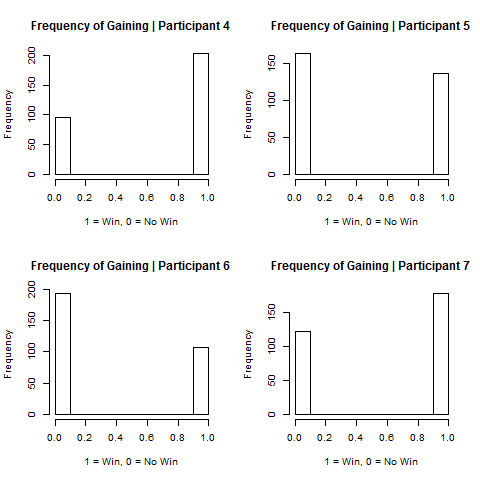

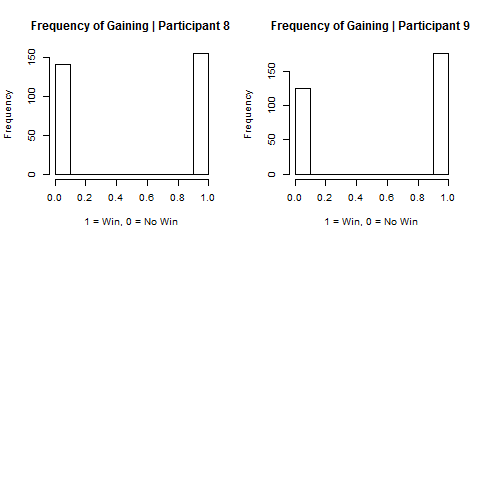

In [29]:
%%R
old.par <- par(mfrow=c(2, 2))

hist(dat$Answer[dat$participant==4], main = 'Frequency of Gaining | Participant 4', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==5], main = 'Frequency of Gaining | Participant 5', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==6], main = 'Frequency of Gaining | Participant 6', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==7], main = 'Frequency of Gaining | Participant 7', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==8], main = 'Frequency of Gaining | Participant 8', xlab = '1 = Win, 0 = No Win')
hist(dat$Answer[dat$participant==9], main = 'Frequency of Gaining | Participant 9', xlab = '1 = Win, 0 = No Win')

par(old.par)

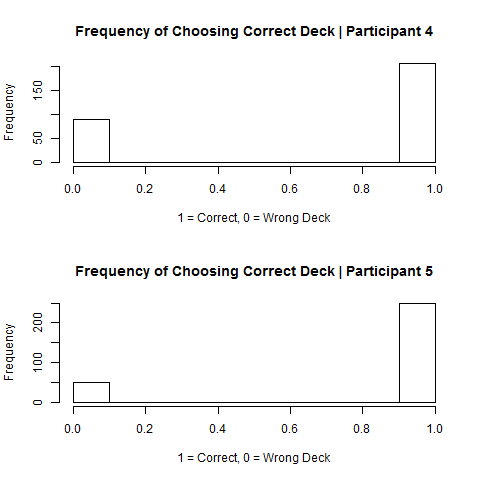

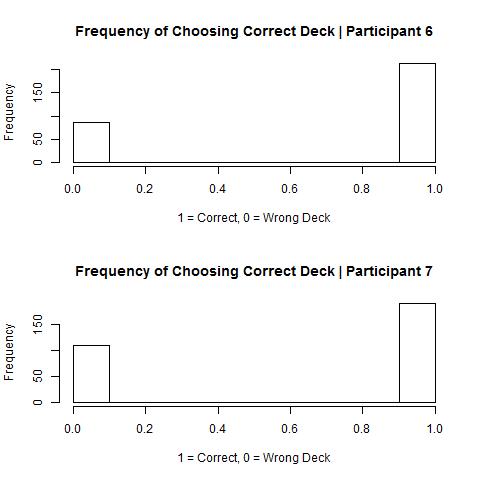

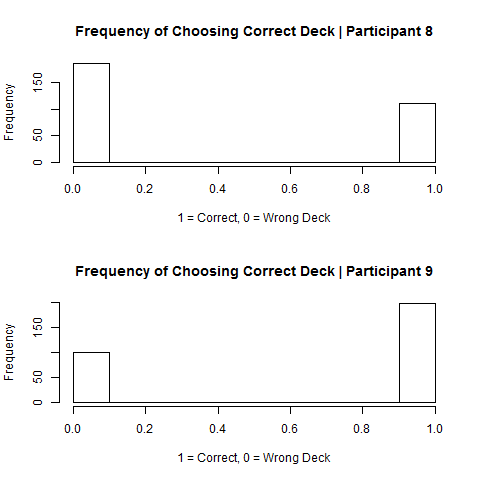

In [30]:
%%R
old.par <- par(mfrow=c(2, 1))

hist(dat$choose_correct_deck[dat$participant==4], main = 'Frequency of Choosing Correct Deck | Participant 4', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==5], main = 'Frequency of Choosing Correct Deck | Participant 5', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==6], main = 'Frequency of Choosing Correct Deck | Participant 6', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==7], main = 'Frequency of Choosing Correct Deck | Participant 7', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==8], main = 'Frequency of Choosing Correct Deck | Participant 8', xlab = '1 = Correct, 0 = Wrong Deck')
hist(dat$choose_correct_deck[dat$participant==9], main = 'Frequency of Choosing Correct Deck | Participant 9', xlab = '1 = Correct, 0 = Wrong Deck')

par(old.par)

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
from scipy import stats
from scipy.stats.stats import pearsonr # Pearson's correlation
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab
import glob

# Show graphs in Notebook
%matplotlib inline

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(15, 15);

# Set up interface with R
import rpy2
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ecem\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
%%R
library("devtools")
library("lme4")
library("plotly")
library("LaplacesDemon")
library("ggplot2")
library("lmerTest")
library("optimx")
library("gdata")
library("Formula")
library("miscTools")
library("maxLik")
library("mlogit")
library("pbkrtest")
library("foreign")
library("MASS")
library("car")
library("tools")
library("nlme")
library('interplot')
library('lattice')

In [6]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [7]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=30)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()